# Machine Learning CW

### Imports

In [13]:
import numpy as np
import skimage.feature
from sklearn import preprocessing
from sklearn.model_selection import train_test_split as TTS
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from tensorflow.keras.utils import to_categorical

### Data Intake

In [86]:
trainImage = np.load('trnImage.npy')
testImage = np.load('tstImage.npy')
trainLabels = np.load('trnLabel.npy')
testLabels = np.load('tstLabel.npy')

### Hog Processing

#### Normailising the Data

In [78]:
trainImage = trainImage.astype('float64')
trainImage /= 255

testImage = testImage.astype('float64')
testImage /= 255

#### Generating HOG Data

In [80]:
trainImageHog = []
for i in range(0,(10000)):
    image = trainImage[:, :, :, i]
    hog_feature = skimage.feature.hog(image, pixels_per_cell=[8,8], cells_per_block=[2,2], channel_axis=2)
    trainImageHog.append(hog_feature)

Need to convert the list to a numpy array to input into the fit() function.
Need to also check the converted array is the right shape (image index, features)

In [81]:
trainImageHog = np.array(trainImageHog)
trainImageHog.shape

(10000, 324)

### Training State Vector Machine model

Here we're setting verbose to true, so we can track the optimising progress, and also the gamma to auto, to set the kernal co-efficent to 1/n_features.

In [82]:
modelSVM = SVC(verbose=True,gamma='auto')
modelSVM.fit(trainImageHog,trainLabels.ravel())

[LibSVM]*
optimization finished, #iter = 896
obj = -1394.421613, rho = -1.393660
nSV = 1739, nBSV = 1727
*
optimization finished, #iter = 803
obj = -1240.577514, rho = -0.460395
nSV = 1464, nBSV = 1442
*
optimization finished, #iter = 686
obj = -1028.009703, rho = -1.024320
nSV = 1271, nBSV = 1259
*
optimization finished, #iter = 803
obj = -1214.913537, rho = -1.903455
nSV = 1483, nBSV = 1476
*
optimization finished, #iter = 643
obj = -928.777246, rho = -1.226732
nSV = 1183, nBSV = 1166
*
optimization finished, #iter = 702
obj = -1038.130312, rho = -1.725239
nSV = 1326, nBSV = 1311
*
optimization finished, #iter = 759
obj = -1139.729127, rho = -1.409505
nSV = 1423, nBSV = 1408
*
optimization finished, #iter = 968
obj = -1643.196628, rho = -0.980600
nSV = 1887, nBSV = 1880
*
optimization finished, #iter = 803
obj = -1203.312779, rho = -1.605082
nSV = 1523, nBSV = 1505
*
optimization finished, #iter = 728
obj = -1128.142398, rho = 0.486463
nSV = 1413, nBSV = 1396
*
optimization finished,

SVC(gamma='auto', verbose=True)

Before we can evaluate the accuracy of the model, we have to convert the test dataset in the same way we did the training set.

In [83]:
testImageHog = []
for i in range(0,(1000)):
    image = testImage[:, :, :, i]
    hog_feature = skimage.feature.hog(image, pixels_per_cell=[8,8], cells_per_block=[2,2], channel_axis=2)
    testImageHog.append(hog_feature)

testImageHog = np.array(testImageHog)
testImageHog.shape    

(1000, 324)

In [84]:
predict = modelSVM.predict(testImageHog)
print(accuracy_score(testLabels , predict))

0.465


0.465, pretty good

### SVM Results

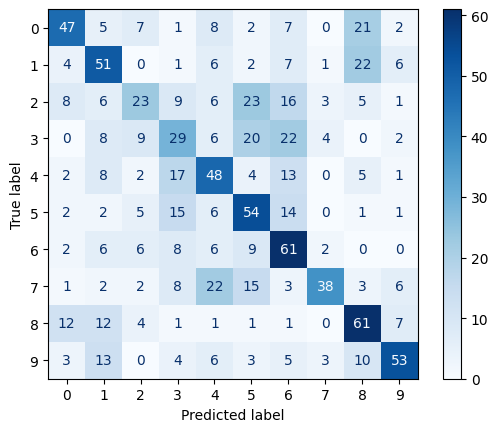

In [85]:
ConfusionMatrixDisplay.from_estimator(
        modelSVM,
        testImageHog,
        testLabels,
        cmap=plt.cm.Blues,
    )
plt.show()

### Using CNN

In [62]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), padding='same', activation="relu",input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2), strides=2),
    layers.Conv2D(64, (3,3), padding='same', activation="relu"),
    layers.MaxPooling2D((2, 2), strides=2),
    layers.Flatten(),
    layers.Dense(100, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [63]:
model.compile(optimizer=tf.keras.optimizers.SGD(), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              metrics=tf.keras.metrics.SparseCategoricalAccuracy())

Moving the axis of the train and test dataset, so the model iterates over images properly

In [70]:
trainImage2 = np.moveaxis(trainImage,3,0)
testImage2 = np.moveaxis(testImage,3,0)
history = model.fit(trainImage2, trainLabels, epochs=100, validation_data=(testImage2,testLabels))

Epoch 1/100
313/313 [==============================] - 7s 23ms/step - loss: 1.3545 - sparse_categorical_accuracy: 0.5203 - val_loss: 1.4432 - val_sparse_categorical_accuracy: 0.4960
Epoch 2/100
313/313 [==============================] - 7s 23ms/step - loss: 1.3138 - sparse_categorical_accuracy: 0.5338 - val_loss: 1.5367 - val_sparse_categorical_accuracy: 0.4660
Epoch 3/100
313/313 [==============================] - 7s 23ms/step - loss: 1.2832 - sparse_categorical_accuracy: 0.5434 - val_loss: 1.3891 - val_sparse_categorical_accuracy: 0.5050
Epoch 4/100
313/313 [==============================] - 7s 23ms/step - loss: 1.2420 - sparse_categorical_accuracy: 0.5546 - val_loss: 1.4425 - val_sparse_categorical_accuracy: 0.4640
Epoch 5/100
313/313 [==============================] - 7s 23ms/step - loss: 1.2134 - sparse_categorical_accuracy: 0.5693 - val_loss: 1.3834 - val_sparse_categorical_accuracy: 0.5020
Epoch 6/100
313/313 [==============================] - 7s 23ms/step - loss: 1.1792 - spars

In [71]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 flatten_7 (Flatten)         (None, 4096)              0         
                                                                 
 dense_6 (Dense)             (None, 100)              

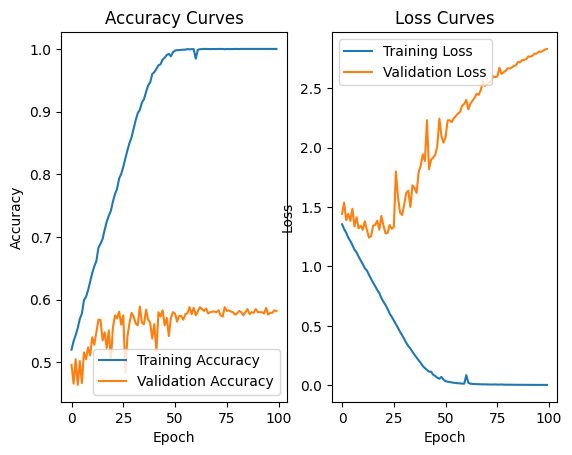

In [87]:
plt.subplot(121)
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy',
           'Validation Accuracy'])
plt.title('Accuracy Curves')

plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss',
           'Validation Loss'])
plt.title('Loss Curves')
plt.show()

In [73]:
test_loss, test_acc = model.evaluate(testImage2,testLabels, verbose=2)

32/32 - 0s - loss: 2.8308 - sparse_categorical_accuracy: 0.5820 - 231ms/epoch - 7ms/step


In [74]:
print(model.predict(testImage2))

32/32 [==============================] - 0s 7ms/step
[[1.49394050e-01 2.19295430e-06 4.16877519e-05 ... 3.46753441e-05
  8.45222294e-01 5.04785404e-03]
 [3.11085713e-10 1.88204638e-06 1.21414666e-06 ... 8.48189314e-12
  9.99969840e-01 4.97662391e-08]
 [4.24196038e-08 2.31829816e-07 6.93795573e-06 ... 4.02011651e-08
  9.89063799e-01 1.62511933e-05]
 ...
 [8.49110151e-08 1.11783578e-08 2.25796707e-14 ... 1.62070246e-09
  2.39971634e-08 9.99999881e-01]
 [3.22835036e-10 2.28110139e-06 5.37559663e-06 ... 3.98996872e-06
  1.00952934e-10 9.99313831e-01]
 [5.58544944e-09 3.07056625e-09 5.77890020e-08 ... 9.26598798e-09
  3.54853841e-10 5.79306901e-01]]


### CNN output

32/32 [==============================] - 0s 7ms/step


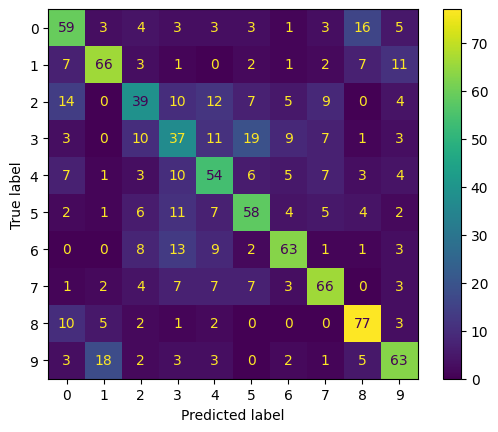

In [75]:
ConfusionMatrixDisplay.from_predictions(testLabels, model.predict(testImage2).argmax(axis=1))
plt.show()